## Оценка данных клиентов алкогольной продукции

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, estimate_bandwidth, MeanShift
from kmodes.kmodes import KModes

%matplotlib inline
warnings.filterwarnings("ignore")

Данные

In [48]:
df = pd.read_csv("../../data/customers_offers.csv")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Разбить данные

In [49]:
X_train, X_test = train_test_split(df, random_state = 100)

Найти оптимальное количество кластеров

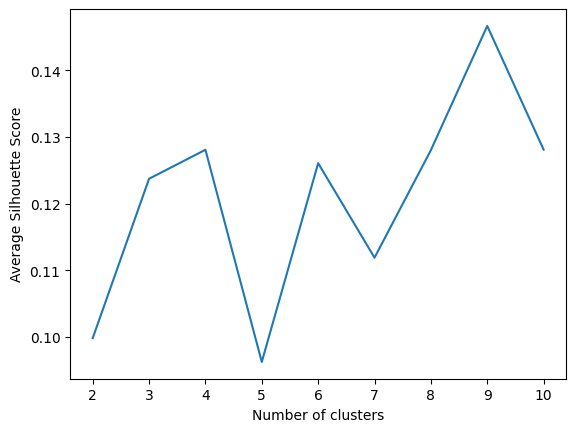

In [55]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes)
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

Значение силуэта для к=9

На тестовых данных совсем маленькое значение получилось

In [69]:
model = KMeans(n_clusters=5, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.06934742503590163


In [52]:
bandwidth = estimate_bandwidth(X_train, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


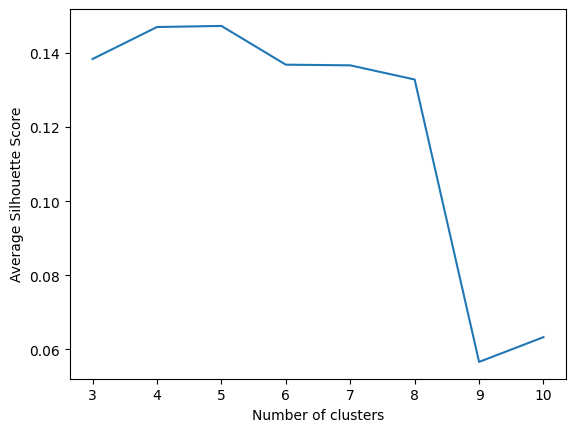

In [64]:
krange = list(range(3,11))
avg_silhouettes = []

for n in krange:
    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)
    kmode_labels = km.predict(X_train)
    kmode_silhouette = silhouette_score(X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)

plt.plot(krange, avg_silhouettes)
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [65]:
avg_silhouettes

[0.13832989494880277,
 0.14695187523384645,
 0.14725056920861432,
 0.1367981332239175,
 0.1366192271427416,
 0.13279923165129248,
 0.05663594504794573,
 0.06331622446303692]

KModes показал самые лучшие результаты, по сравнению с остальными методами

k = 5 - оучшее значение для количества кластеров

In [66]:
km = KModes(n_clusters=5, random_state=100)
km.fit(X_train)

kmode_labels = km.predict(X_test)
kmode_silhouette = silhouette_score(X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501
